# Iris의 세 가 품종 분류

- 학습 목표
  - scikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.
  - scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.
  - 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
  - Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.
  - 데이셋을 사용해 스스로 분류 기초 실습을 진행할 수 있다.

## 붓꽃 분류 문제
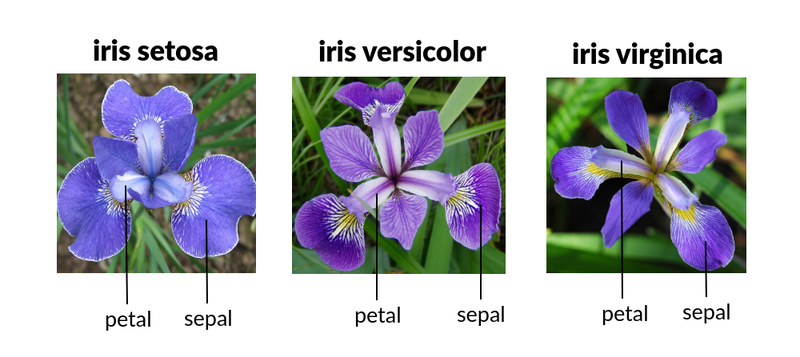

### 붓꽃 분류, 어떤 데이터로 ?

붓꽃 데이터가 예제 데이타로 많이 쓰이는 이유는 머신러닝에서 가장 많이 쓰이는 라이브러리 중 하나인 scikit-learn에 내장된 데이터이다.  
scikit-learn은 예제로 활용해 볼 수 있는 데이터를 몇 가지 제공한다.

https://scikit-learn.org/stable/datasets.html

## 데이터 준비, 그리고 자세히 살펴보기

### 데이터 로드

In [1]:
from sklearn.datasets import load_iris

# 데이터셋 로드
iris = load_iris()

# dir() : 객체가 어떤 변수와 메서드를 가지고 있는지 나열
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


### 데이터 정보 확인

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 중요한 데이터 변수 저장

In [3]:
iris_data = iris.data
print(f'iris data shape : {iris_data.shape}')

iris data shape : (150, 4)


#### 샘플 데이터 확인

In [4]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

### 타겟 데이터 확인
꽃잎과 꽃받침의 길이가 주어지는 경우 그 꽃은 세 가지의 붓꽃 품종 중 어떤 것인지 맞추는 문제   
따라서 머신러닝 모델에게 꽃잎, 꽃받침의 길이와 폭 정보를 입력했을 떄, 붓꽃의 품을 출력하도록 학습시켜야 한다.  
머신러닝 모델이 출력애햐 하는 정답을 라벨(label) 또는 타겟(target)이라고 한다.

In [7]:
iris_label = iris.target

print(iris_label.shape)

(150,)


In [9]:
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 타겟 이름

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 데이터셋 설명

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- feature name

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- 데이터셋 전체 이름

In [13]:
iris.filename

'iris.csv'

## 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비

In [14]:
import pandas as pd

print(pd.__version__)

2.0.3


In [15]:
type(iris_data)

numpy.ndarray

In [16]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
iris_df['label'] = iris.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### training datset, test dataset 분리

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=7)


print(f'X train shape : {X_train.shape}')
print(f'y train shape : {y_train.shape}')
print(f'X test shape : {X_test.shape}')
print(f'y test shape : {y_test.shape}')

X train shape : (120, 4)
y train shape : (120,)
X test shape : (30, 4)
y test shape : (30,)


## 첫 번째 머신러닝 실습

### 첫 번째 머신러닝 모델 학습시키기

머신러닝은 크게 지도학습, 비지도 학습 두가지로 구분된다.  
- 지도학습: 정답이 있는 문제에 대해 학습하는 것
  - 분류: 입력 받은 데이터를 특징 카테고리 중 하나로 분류해내는 문제
  - 회귀: 입력 받은 데이터에 따라 특정 필드의 수치를 맞히는 문제
- 비지도 학습: 정답이 없는 문제를 학습하는 것

iris 문제
- 머신 러닝 중 정답을 맞히기 위해 학습하는 **지도 학습**
- 지도학습 중에서는 특정 카테고리 중 주어진 데이터가 어떤 카테고리에 해당하는지를 맞히는 **분류 문제**

#### Decision Tree
데이터를 분리할 어떤 경계를 찾아내어 데이터를 체에 거르듯 한 단계씩 분류해나가는 모델

In [29]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 

print(decision_tree._estimator_type)

classifier


- 학습  
훈련 데이터로 모델을 학습시킨다는 것은, 달리 말하면 훈련데이터에 맞게 모델을 fitting, 즉 맞추는 것이라고 할 수 있다.  
훈련 데이터에 있는 데이터들을 통해 어떠한 패턴을 파악하고, 그 패턴에 맞게 예측할 수 있도록 학습되기 때문이다.   
즉, 다른 말로 하면 모델은 훈련 데이터에 존재하지 않은 데이터에 대해서 정확한 정답 카테고리가 무엇인지 알지 못한다.  
다만 훈련데 데이터를 통해 학습한 패턴으로 새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐이다.  
그렇기 때문에 새로운 데이터에 대해서도 잘 맞출 수 있기 위해서는 훈련데이터가 어떻게 구성되어 있는지 매우 중요하다.

In [30]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

### 첫 번째 머신러닝 모델 평가하기

In [31]:
y_pred = decision_tree.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2])

- 비교

In [32]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1,
       1, 1, 0, 1, 0, 0, 1, 2])

- 정확도  
$정확도 = \frac{예측 결과가 정답인 데이터의 개수}{예측한 전체 데이터의 개수}$


In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



### 다른 모델도 해보고 싶다면? 코드 한줄만 바꾸면 된다.

#### RandomForest
Decision Tree 모델을 여러 개 합쳐놓음으로써 Decision Tree의 단점을 극복한 모델  
앙상블(ensemble): 단일 모델을 여러 개 사용하는 방법을 취함으로써 모델 한 개만 사용할 때의 단점을 집단지성으로 극복하는 개념

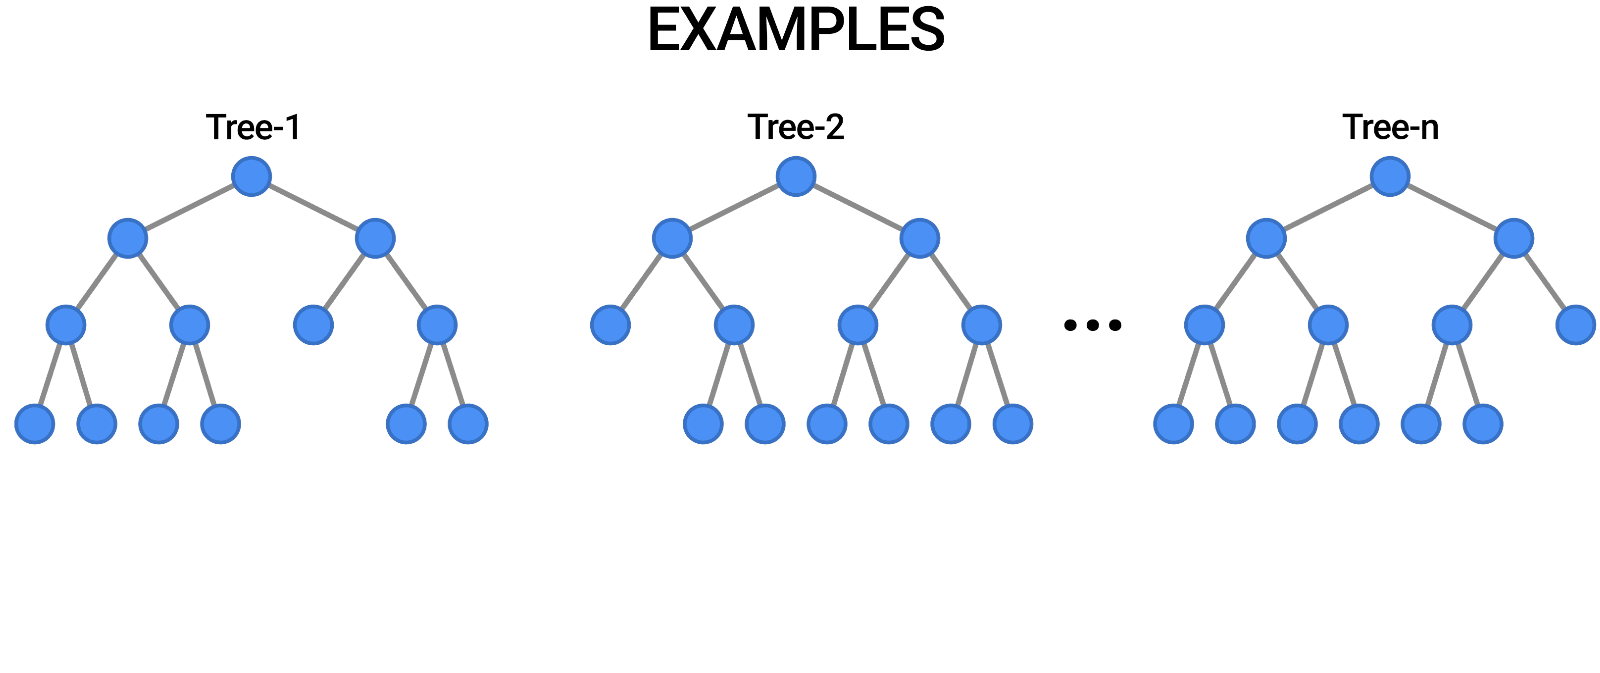


In [36]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)     # 훈련
y_pred = random_forest.predict(X_test)  # 예측

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



#### SVM
Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘  

2 차원 공간에서, 즉 데이터에 2개의 클래스만 존재할 때,
- Decision Boundary(결정 경계): 두 개의 클래스를 구분해 주는 선  
- Support Vector: Decision Boundary에 가까이 있는 데이터  
- Margin: Decision Boundary와 Support Vector 사이의 거리  

Margin이 넓을수록 새로운 데이터를 잘 구분할 수 있다. (Margin 최대화 -> robustness 최대화)
- Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업.  
  - 데이터의 분포가 Linearly separable 하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable하도록 만든다.
- cost: Decision Boundary와 Margin의 간격 결정.
  - cost가 높으면 Margin이 좁아지고 train error가 작아진다. 
  - 그러나 새로운 데이터에서는 분류를 잘 할 수 있다.
  - cost가 낮으면 Margin이 넓어지고, train error는 커진다.
- γ: 한 train data당 영향을 미치는 범위 결정. 
  - γ가 커지면 영향을 미치는 범위가 줄어들고, Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다. 
  - 따라서 Decision Boundary는 구불구불하게 그어진다. (오버피팅 초래 가능) 
  - 작아지면 데이터가 영향을 미치는 범위가 커지고, 대부분의 데이터가 Decision Boundary에 영향을 준다. 
  - 따라서 Decision Boundary는 직선에 가까워진다.



In [37]:
from sklearn import svm 
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [38]:
svm_model.fit(X_train, y_train)     # 훈련
y_pred = svm_model.predict(X_test)  # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



#### SGD (Stochastic Gradient Descent) 
배치 크기가 1인 경사하강법 알고리즘  
즉, 확률적 경사하강법은 데이터 세트에서 무작위로 균일하게 선택한 하나의 데이터 포인트를 이용하여 각 단계의 예측 경사를 계산

배치란? 경사하강법에서 배치는 단일 반복에서 기울기를 계산하는 데 사용하는 예(data)의 총 개수  
Gradient Descent 에서의 배치는 전체 데이터 셋라고 가정한다.

In [39]:
from sklearn.linear_model import SGDClassifier 
sgd_model = SGDClassifier() 

print(sgd_model._estimator_type)

classifier


In [40]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        11
           1       0.00      0.00      0.00        12
           2       0.78      1.00      0.88         7

    accuracy                           0.60        30
   macro avg       0.43      0.67      0.52        30
weighted avg       0.37      0.60      0.46        30



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

#### Logistic Regression
선형 분류 알고리즘, 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘  
다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 한다. 이름은 회귀지만, 실제로는 분류를 수행  

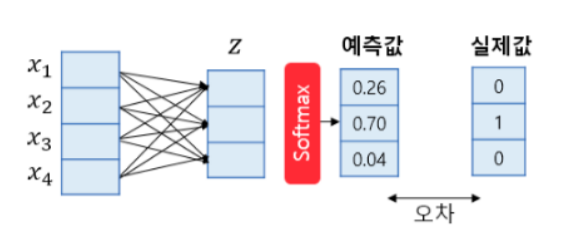

소프트맥스 함수: 클래스가 N개일 때, N차원의 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수.   
위의 그림은 4차원의 벡터를 입력으로 받아 3개의 클래스를 예측하는 경우의 소프트맥스 회귀의 동작 과정을 보여준다.  
3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률이다. 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습된다.

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [42]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## 다양하게 평가해 보기

### 정확도에는 함정이 있다

In [43]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [44]:
digits_data = digits.data
digits_data.shape  # (손글씨 이미지의 개수, 이미지 당 Pixel 수)

(1797, 64)

In [45]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

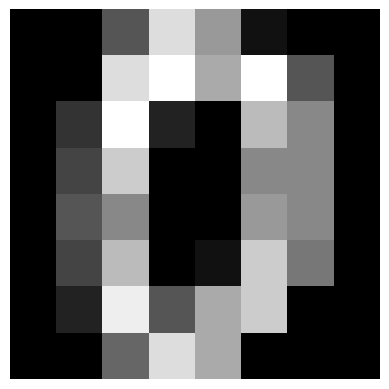

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline 
# 브라우저에서 바로 그림을 볼 수 있게 해주는 역할을 합니다 

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

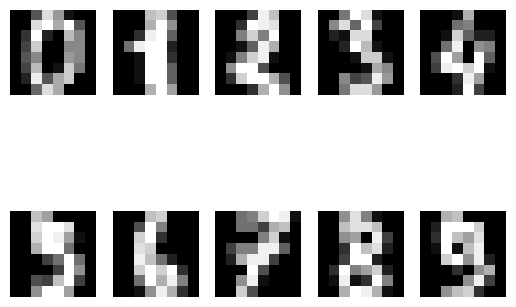

In [47]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    plt.axis('off')
plt.show()

- target data

In [48]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- 정확도의 함정

In [49]:
# 각 Label을 참조하여, 해당 이미지가 나타내는 숫자가 3이라면 3을 할당하고, 3이 아니라면 0을 할당하여 새로운 칼럼 new_label을 생성
new_label = [3 if i == 3 else 0 for i in digits_label] 
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [50]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

'''
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)


# test_size : 전체 데이터 셋 중 Test Dataset에 포함하려고 하는 비율 
# shuffle : Training Dataset과 Test Dataset으로 나누기 전에, 데이터들을 뒤섞을지 여부
'''
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) 
accuracy

0.9388888888888889

- 어떤 함점일까?  
총 10개의 숫자 중 3에만 집중을 해서, 3이라면 3으로, 3이 아니라면 0으로 맞추는 문제로 변형했다.  
그런 이유로, 정답 데이터인 label은 0이 매우 많고 3은 적은 불균형 데이터가 되었다.  
9개의 숫자들은 label이 모두 0이 되었고, 3만 3으로 남아있었으니 대략 90%의 label이 모두 0이라는 이야기다.  
바로 모델이 전혀 학습하지 않고 정답을 모두 0으로만 선택해도 정확도가 90%가량이 나오게 된다. 

In [51]:
fake_pred = [0] * len(y_pred) # 0으로만 이루어진 가짜 답안지 준비

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

### 정답과 오답에도 종류가 있다.
오차 행렬(confusion matrix) : 정답과 오답을 구분하여 표현하는 방법  
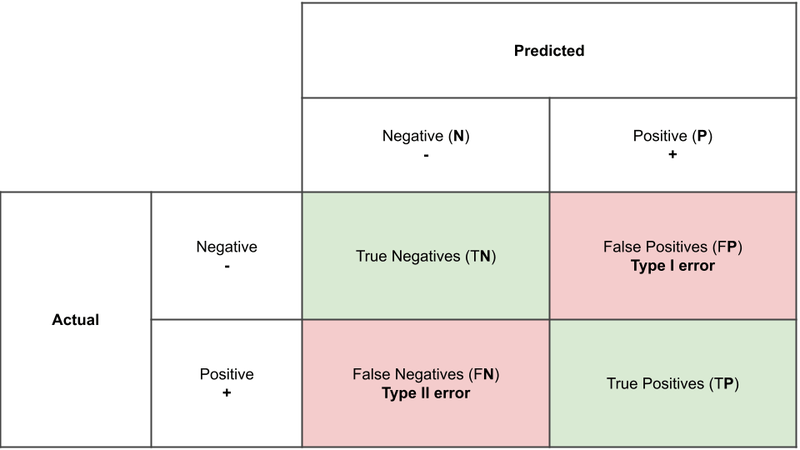

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

In [53]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])